In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# load data
df = pd.read_csv('data/merged.csv')

In [3]:
# filter rows
df = df[['coord_x', 'coord_y', 'year', 'multiple_floors', 'num_rooms', 'area', 'floor', 'price']]

In [4]:
# split data
df_price = df[~df['price'].isna()]
split_idx = len(df_price)//2
df_train = df_price[:split_idx]
df_valid = df_price[split_idx:]

x_train = df_train.loc[:, df_price.columns != 'price'].to_numpy()
x_valid = df_valid.loc[:, df_price.columns != 'price'].to_numpy()
y_train = df_train['price'].to_numpy()
y_valid = df_valid['price'].to_numpy()

In [5]:
# normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
# y_valid = (y_valid - y_mean) / y_std

In [6]:
x_train = np.nan_to_num(x_train, nan=0)
x_valid = np.nan_to_num(x_valid, nan=0)

In [7]:
x_train = x_train[:,4:5]

# Fit Regressor

0.001
0.3157756038657141


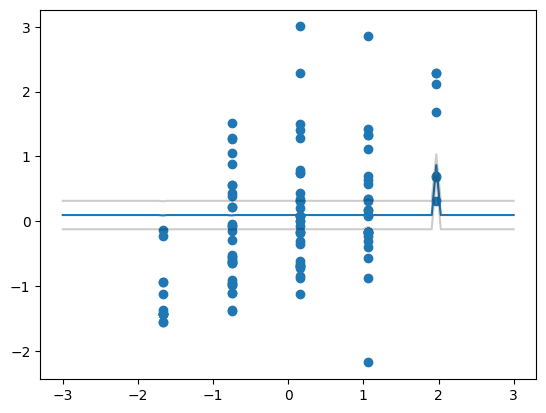

0.0071968567300115215
0.3157756038657141


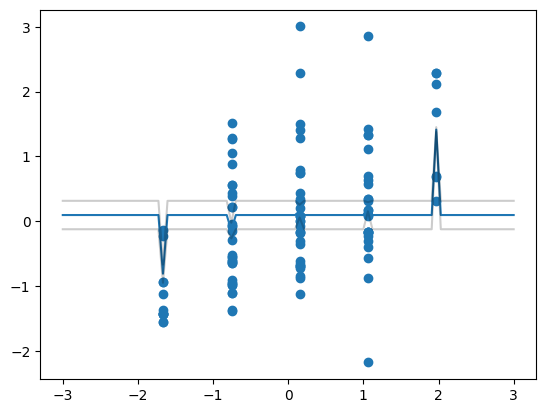

0.0517947467923121
-0.16697168705808507


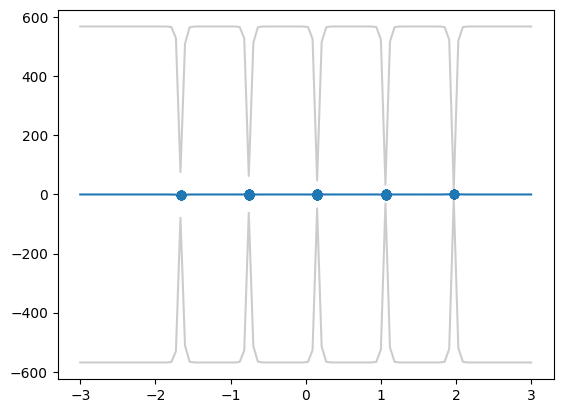

0.3727593720314938
0.31577680088237614


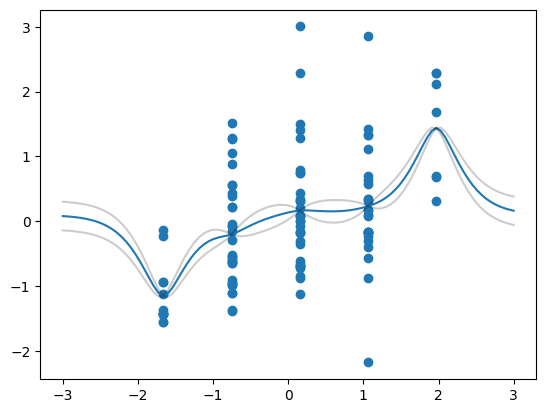

2.6826957952797246
0.3157745908427615


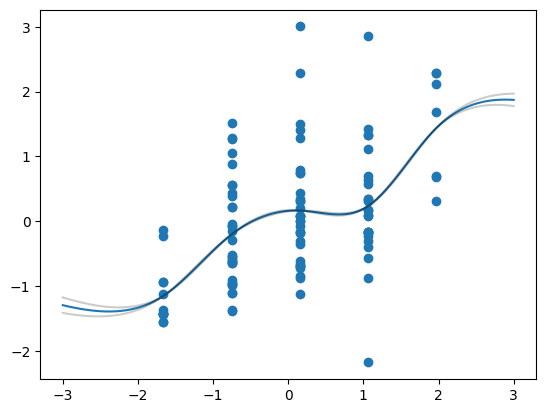

19.306977288832496
0.31577750830120876


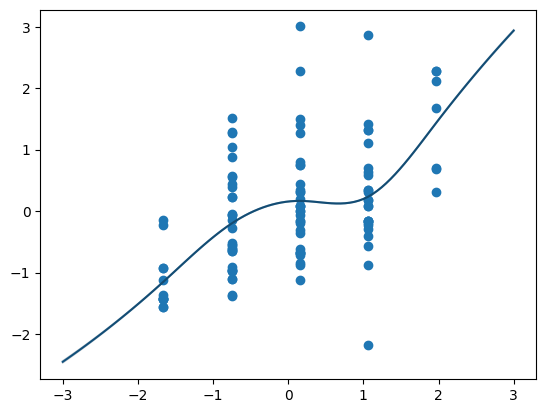

138.9495494373136
0.3157755269303849


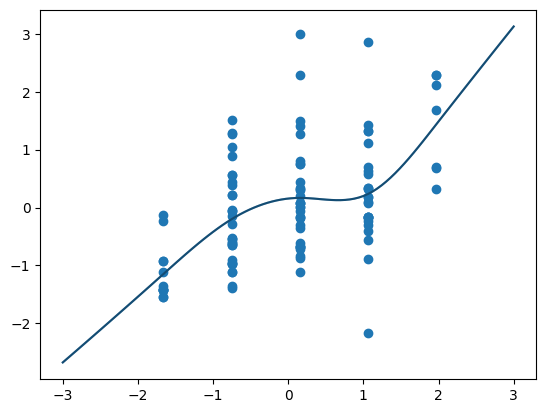

1000.0
0.3129064076250101


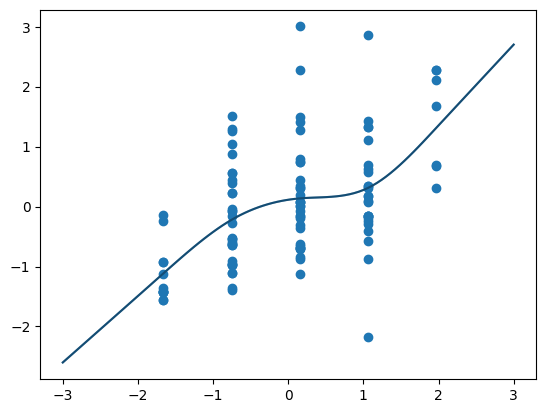

In [19]:
for length_scale in np.logspace(-3, 3, 8):
    kernel = 0.01 * Matern(length_scale=length_scale) + 1
    gpr = GaussianProcessRegressor(kernel=kernel).fit(x_train, y_train)
    print(length_scale)
    print(gpr.score(x_train, y_train))
    x_eval = np.linspace(-3, 3, 100).reshape((100, 1))
    y_pred, y_pred_std = gpr.predict(x_eval, return_std=True)
    plt.plot(x_eval, y_pred)
    plt.plot(x_eval, y_pred+2*y_pred_std, color=(0, 0, 0, 0.2))
    plt.plot(x_eval, y_pred-2*y_pred_std, color=(0, 0, 0, 0.2))
    plt.scatter(x_train[:,0], y_train)
    plt.show()

In [13]:
kernel = Matern(length_scale=10)
gpr = GaussianProcessRegressor(kernel=kernel).fit(x_train, y_train)
y_pred, y_pred_std = gpr.predict(x_train, return_std=True)

/home/fabian/.local/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
